# Salary Prediction (Regression Problem) Machine Learning

# Import Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [48]:
data=pd.read_csv("Salary.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [49]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [50]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [51]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


# Visualize data

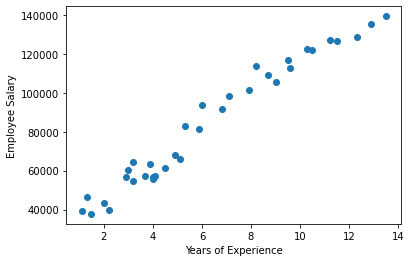

In [52]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Employee Salary')
plt.show()

# Prepare data

In [53]:
x=data.drop('Salary',axis=1)
y=data['Salary']

In [54]:
x.shape,y.shape

((35, 1), (35,))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

# Split data into train and test

In [56]:
X_train,x_test,Y_train,y_test= train_test_split(x,y,random_state=1,test_size=0.2)

# Define LinearRegression Model

In [57]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [58]:
pred=lr.predict(x_test)
pred

array([ 68002.21391858,  81056.93174216,  46244.35087929, 120221.08521288,
       141108.6337306 , 118480.45616974,  97592.90765202])

In [59]:
y_test

14     61111
19     93940
3      43525
29    121872
33    135675
28    122391
22    101302
Name: Salary, dtype: int64

In [60]:
diff=y_test-pred

# Visualize Model, that how it is performing on training data

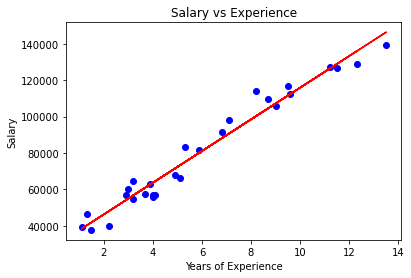

In [61]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

# Visualize Model, that how it is performing on testing data

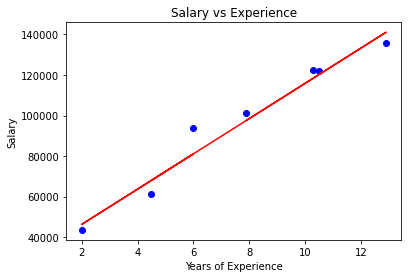

In [62]:
plt.scatter(x_test , y_test,color='blue')
plt.plot(x_test ,lr.predict(x_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

# Evaluate

In [63]:
lr.score(x_test , y_test)

0.9593108462602296

In [64]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [65]:
rmse,r2

(6348.866720688848, 0.9593108462602296)

# Test

In [66]:
exp = 3
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 3 year experience employee = 54947 thousands


In [67]:
exp = 5
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 5 year experience employee = 72353 thousands


In [70]:
exp = 9
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 9 year experience employee = 107166 thousands
